In [9]:
import torch
import matplotlib.pyplot as plt
import ESN
import Dynamics_Res
import time
import numpy as np
import json
import csv
from dataclasses import dataclass, asdict

torch.set_default_device("cuda:0")
torch.set_default_dtype(torch.double)

# Parameters
Two,Ttrain = 2000,100000
N = 10
C = 0
rho=0.9
dim = 3
sigma = 1.0


sigmas = torch.linspace(0.1,2.0,39)
rhos = torch.linspace(0.1,1.2,23)

N_d = int(N * dim)
N_d = 20


shftreg = False
idwin = False
#actf = "identity"
actf = "tanh"


fn_i = "10N_3din"
#u_sym = torch.load('./experiments/inputs/'+fn_i+'_i.pt')
#ti = torch.load('./experiments/target_info/'+fn_i+'_ti.pt')



In [13]:
for sigma in sigmas:
    fn = r"20N_3din_%.2f_s"%(sigma)
    
    setting = {"input dim":dim,"Two":Two, "Ttrain":Ttrain,"sigma":float(sigma),"rho" : float(rho),
                "Nodes":N_d,"uC":C, "actf":actf,"identical Win":idwin,"input dist":"uniform"}
    
    # store experiment setting 
    with open('./experiments/settings/'+fn+'_s.txt', 'x') as fp:
        data = json.dump(setting,fp)

    ## construct ESN model
    ## run and washout 
    esn = ESN.ESN_mult(N_d, uC=C,rho=rho, dim=dim,idWin = idwin,sigma=sigma)
    st = time.time()
    Xwo = esn.run_washout(u_sym, Two, actf=actf)
    print("runtime :",time.time()-st)

    torch.save(Xwo,f"./experiments/datamatrices/{fn}_d.pt")

    ## calculate ipc
    
    st = time.time()
    
    raw,thr,thr_scl,rev,sur = ESN.calc_capacity(Xwo,ti.tar_f,ret_all=True,thr_scale=1.2)
    
#    print("ipc :",time.time()-st)
    capacities = thr_scl
    
    IPC = ESN.IPC_w_targetinfo(capacities,target_info=ti)
    
    torch.save(IPC,f"./experiments/ipcs/{fn}_ipc.pt")
    torch.save(raw,f"./experiments/ipcs/{fn}_raw.pt")
    torch.save(sur,f"./experiments/ipcs/{fn}_sur.pt")
    
    print("result for sigma = ",sigma.cpu().numpy())
    totCapacity = torch.sum(capacities).cpu().numpy()
    print("totoal capacity:",totCapacity)
    

runtime : 14.553622722625732
result for sigma =  0.1
totoal capacity: 19.331826450237262
runtime : 14.265358209609985
result for sigma =  0.15
totoal capacity: 19.223298719917185
runtime : 14.291749238967896
result for sigma =  0.2
totoal capacity: 19.223435593043675
runtime : 14.363247394561768
result for sigma =  0.25
totoal capacity: 19.246309739845252
runtime : 14.441686868667603
result for sigma =  0.3
totoal capacity: 19.258479638786472
runtime : 14.377079963684082
result for sigma =  0.35
totoal capacity: 19.247150020397772
runtime : 14.438503980636597
result for sigma =  0.39999999999999997
totoal capacity: 19.22370575936484
runtime : 14.544231176376343
result for sigma =  0.44999999999999996
totoal capacity: 19.192644937030714
runtime : 14.495814085006714
result for sigma =  0.5
totoal capacity: 19.15187007795601
runtime : 14.520119190216064
result for sigma =  0.5499999999999999
totoal capacity: 19.10156907701135
runtime : 14.446471691131592
result for sigma =  0.6
totoal cap

In [14]:
sigma = 0.5

for rho in rhos:
    fn = r"20N_3din_%.2f_rho"%(rho)
    
    setting = {"input dim":dim,"Two":Two, "Ttrain":Ttrain,"sigma":float(sigma),"rho" : float(rho),
                "Nodes":N_d,"uC":C, "actf":actf,"identical Win":idwin,"input dist":"uniform"}
    
    # store experiment setting 
    with open('./experiments/settings/'+fn+'_s.txt', 'x') as fp:
        data = json.dump(setting,fp)

    ## construct ESN model
    ## run and washout 
    esn = ESN.ESN_mult(N_d, uC=C,rho=rho, dim=dim,idWin = idwin,sigma=sigma)
    st = time.time()
    Xwo = esn.run_washout(u_sym, Two, actf=actf)
    print("runtime :",time.time()-st)

    torch.save(Xwo,f"./experiments/datamatrices/{fn}_d.pt")

    ## calculate ipc
    
    st = time.time()
    
    raw,thr,thr_scl,rev,sur = ESN.calc_capacity(Xwo,ti.tar_f,ret_all=True,thr_scale=1.2)
    
#    print("ipc :",time.time()-st)
    capacities = thr_scl
    
    IPC = ESN.IPC_w_targetinfo(capacities,target_info=ti)
    
    torch.save(IPC,f"./experiments/ipcs/{fn}_ipc.pt")
    torch.save(raw,f"./experiments/ipcs/{fn}_raw.pt")
    torch.save(sur,f"./experiments/ipcs/{fn}_sur.pt")
    
    print("result for rho = ",rho.cpu().numpy())
    totCapacity = torch.sum(capacities).cpu().numpy()
    print("totoal capacity:",totCapacity)
    

runtime : 14.51331901550293
result for rho =  0.1
totoal capacity: 20.06576674180802
runtime : 14.326895713806152
result for rho =  0.15
totoal capacity: 20.06332253981229
runtime : 14.545135736465454
result for rho =  0.2
totoal capacity: 20.042429343523203
runtime : 14.32207202911377
result for rho =  0.25
totoal capacity: 20.02886102681369
runtime : 14.419488430023193
result for rho =  0.3
totoal capacity: 20.01383642598604
runtime : 14.238220930099487
result for rho =  0.35
totoal capacity: 20.008646316649592
runtime : 14.369298219680786
result for rho =  0.39999999999999997
totoal capacity: 20.00445382985232
runtime : 14.315255880355835
result for rho =  0.44999999999999996
totoal capacity: 19.986464103600678
runtime : 14.244086265563965
result for rho =  0.5
totoal capacity: 19.963713197041596
runtime : 14.390171527862549
result for rho =  0.5499999999999999
totoal capacity: 19.93056632148932
runtime : 14.440274477005005
result for rho =  0.6
totoal capacity: 19.892548361440888
r

In [23]:
rho= 0.001

## construct ESN model
## run and washout 
esn = ESN.ESN_mult(N_d, uC=C,rho=rho, dim=dim,idWin = idwin,sigma=sigma)
st = time.time()
Xwo = esn.run_washout(u_sym, Two, actf=actf)
print("runtime :",time.time()-st)

torch.save(Xwo,f"./experiments/datamatrices/{fn}_d.pt")

## calculate ipc

st = time.time()

raw,thr,thr_scl,rev,sur = ESN.calc_capacity(Xwo,ti.tar_f,ret_all=True,thr_scale=1.2)

#    print("ipc :",time.time()-st)
capacities = thr_scl

IPC = ESN.IPC_w_targetinfo(capacities,target_info=ti)

torch.save(IPC,f"./experiments/ipcs/{fn}_ipc.pt")
torch.save(raw,f"./experiments/ipcs/{fn}_raw.pt")
torch.save(sur,f"./experiments/ipcs/{fn}_sur.pt")

totCapacity = torch.sum(capacities).cpu().numpy()
print("totoal capacity:",totCapacity)

runtime : 14.891343593597412
totoal capacity: 20.047090071550898


In [53]:
maxdegree=7


ipc_by_deg=[]
for i in range(1,maxdegree+1):
    ipc_by_deg.append(IPC.ipc_by_degree(i))
ipc_by_deg = torch.tensor(ipc_by_deg)
print(ipc_by_deg)

tensor([4.0051e+00, 5.0772e-04, 1.0004e+01, 1.0362e-02, 5.8004e+00, 1.6122e-02,
        2.1033e-01], device='cuda:0')
tensor(10.0043, device='cuda:0')


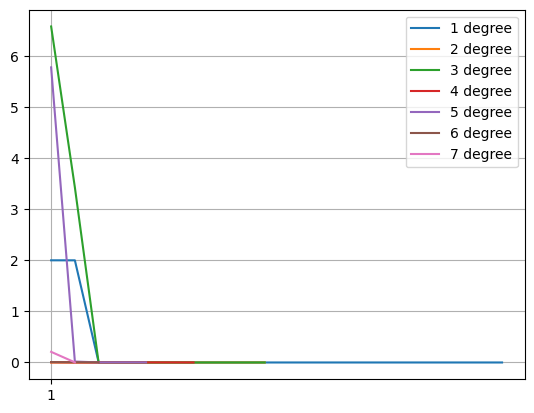

In [39]:
ipc_tau_spread = ESN.ipc_tau_spread(ipc=IPC,mode="sum")

degrees = range(len(ipc_tau_spread))
#degrees = [1,2,3,4]
#degrees = [1,3,4]

for deg in degrees:
    plt.plot(np.arange(1,ipc_tau_spread[deg].shape[0]+1),ipc_tau_spread[deg].cpu().numpy(),label=f"{deg+1} degree")
plt.legend()
plt.xticks([1]+list(np.arange(5,5,5)))
plt.grid()
plt.show()